In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
np.random.seed(1)
N = 100
K =3
T3 = np.zeros((N,3), dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3,3]
X_range1 = [-3,3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array([[-.5,-.5],[.5,1.0],[1.0,-.5]])
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]])
Pi = np.array([0.4, 0.8, 1])

In [11]:
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk<Pi[k]:
            T3[n,k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n,:] == 1,k] + Mu[T3[n,:]==1,k])

In [14]:
def show_data(x):
    plt.plot(x[:,0], x[:,1], linestyle ='none', marker='o', markersize=6, markeredgecolor='black', color='gray', alpha =0.8)
    plt.grid(True)

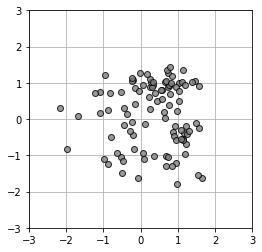

In [31]:
plt.figure(1, figsize=(4,4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz',X=X, X_range0=X_range0, X_range1=X_range1)

In [32]:
Mu = np.array([[-2,1,],[-2,0],[-2,-1]])
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2),dtype=int)]

In [26]:
def show_prm(x,r,mu,col):
    for k in range(K):
        plt.plot(x[r[:,k] == 1,0], x[r[:, k] ==1,1],
            marker='o',
            markerfacecolor=X_col[k], markeredgecolor='k',
            markersize =6, alpha = 0.5, linestyle='none')
        plt.plot(mu[k,0],mu[k,1],
            marker='*',
            markerfacecolor=X_col[k],
            markersize =15,markeredgecolor='r')
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

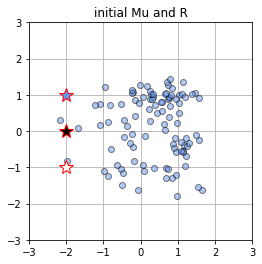

In [33]:
plt.figure(figsize=(4,4))
R = np.c_[np.ones((N,1)), np.zeros((N,2))]
show_prm(X,R,Mu,X_col)
plt.title('initial Mu and R')
plt.show()

In [34]:
def step1_kmeans(x0,x1,mu):
    N=len(x0)
    r = np.zeros((N,K))
    for n in  range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k,0]) **2 + (x1[n]-mu[k,1])**2
        r[n,np.argmin(wk)] =1
    return r

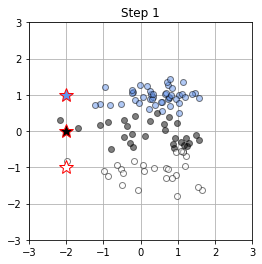

In [37]:
plt.figure(figsize=(4,4))
R = step1_kmeans(X[:,0],X[:,1],Mu)
show_prm(X,R,Mu,X_col)
plt.title('Step 1')
plt.show()

In [52]:
def step2_kmeans(x0,x1,r):
    mu = np.zeros((K,2))
    for k in range(K):
        mu[k,0] = np.sum(r[:,k] * x0) / np.sum(r[:,k])
        mu[k,1] = np.sum(r[:,k] * x1) / np.sum(r[:,k])
    return mu

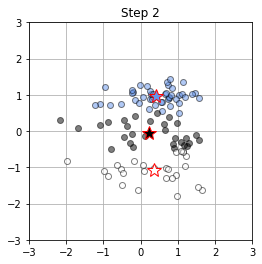

In [53]:
plt.figure(figsize=(4,4))
Mu = step2_kmeans(X[:,0], X[:,1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step 2')
plt.show()

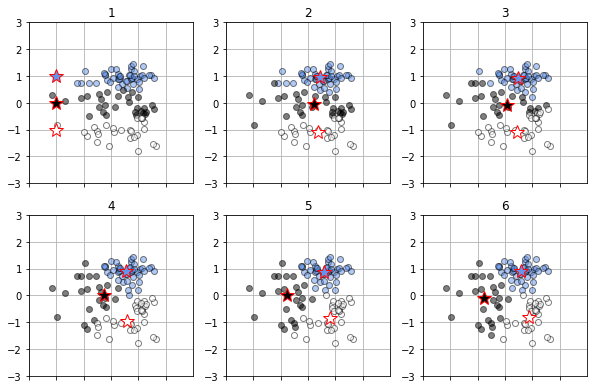

In [59]:
plt.figure(1, figsize=(10,6.5))
Mu = np.array([[-2,1,],[-2,0],[-2,-1]])
max_it = 6
for it in range(0, max_it):
    plt.subplot(2,3,it+1)
    R = step1_kmeans(X[:,0], X[:,1], Mu)
    show_prm(X,R,Mu,X_col)
    plt.title("{}".format(it+1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.xticks(range(X_range1[0], X_range1[1]), "")
    Mu = step2_kmeans(X[:,0], X[:,1],R)
plt.show()

In [55]:
def distrortion_measure(x0, x1, r, mu):
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n,k] * ((x0[n]-mu[k,0])**2 + (x1[n] - mu[k,1])**2)
    return J

In [63]:
Mu = np.array([[-2,1],[-2,0], [-2,-1]])
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2),dtype=int)]
distrortion_measure(X[:,0], X[:,1],R,Mu)

771.7091170334878

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[771.71 627.54  73.57  73.39  72.38  70.39  65.84  57.59  49.7   48.31
  47.78  47.28  46.86  46.86  46.86  46.86  46.86  46.86  46.86  46.86]


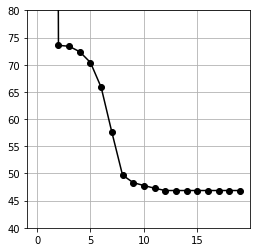

In [76]:
N = X.shape[0]
K = 3
Mu = np.array([[-2,1],[-2,0], [-2,-1]])
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2),dtype=int)]
max_it = 10
it =0
i = 0
DM = np.zeros(20)
print(DM)
for it in range(0, max_it):
    DM[i] = distrortion_measure(X[:,0], X[:,1],R,Mu)
    i+=1
    R = step1_kmeans(X[:,0], X[:,1], Mu)
    DM[i] = distrortion_measure(X[:,0], X[:,1],R,Mu)
    i+=1
    Mu = step2_kmeans(X[:,0], X[:,1],R)
print(np.round(DM,2))
plt.figure(2,figsize=(4,4))
plt.plot(DM, color='black', linestyle='-', marker='o')
plt.ylim(40,80)
plt.grid(True)
plt.show()

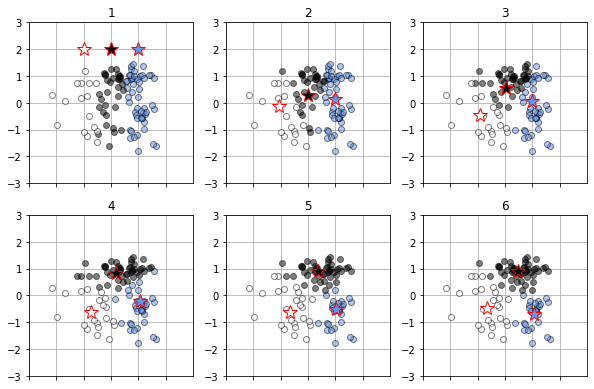

In [81]:
plt.figure(1, figsize=(10,6.5))
Mu = np.array([[1,2,],[0,2],[-1,2]])
max_it = 6
for it in range(0, max_it):
    plt.subplot(2,3,it+1)
    R = step1_kmeans(X[:,0], X[:,1], Mu)
    show_prm(X,R,Mu,X_col)
    plt.title("{}".format(it+1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.xticks(range(X_range1[0], X_range1[1]), "")
    Mu = step2_kmeans(X[:,0], X[:,1],R)
plt.show()